In [1]:
import numpy as np

In [2]:
def generateKoordinatCity(numOfCity):

    count = 0
    temp=[]
    while count < numOfCity :
        coordinate_x= int(input(f"masukkan koordinat kota {count+1} x : "))
        coordinate_y= int(input(f"masukkan koordinat kota {count+1} y : "))
        if [coordinate_x,coordinate_y] not in temp :
            temp.append([coordinate_x,coordinate_y])
            count+=1
    return np.array(temp)



In [3]:
def generateIndividu(numOfCity):
    ind = np.zeros(numOfCity,dtype=int)-1
    count = 0
    while count < numOfCity:
        temp = np.random.randint(numOfCity)
        if temp not in ind :
            ind[count] = temp
            count += 1
    return ind



In [4]:
def generatePopulation(individu,numOfCity):
    population = np.zeros([individu,numOfCity],dtype=int)
    for i in range(individu):
        population[i] =  generateIndividu(numOfCity)
    location = generateKoordinatCity(numOfCity)
    return population,location



In [5]:
def calculateFitness(population,coordinat):
    (numOfIndividu,numOfCity) = population.shape
    fitness = np.zeros(numOfIndividu)
    for i in range(numOfIndividu):
        jarak=0.0
        for j in range(numOfCity-1):
            jarak += np.sqrt(sum((coordinat[population[i,j]]-coordinat[population[i,j+1]])**2))
        fitness[i] = 1/jarak
    return fitness

In [6]:
def selection(fitness):

    totalFitness = np.sum(fitness)

    probIndividu = fitness/totalFitness
    sizeIndividu= len(fitness)

    komulatif = np.zeros(sizeIndividu+1)
    for i in range(sizeIndividu):
        komulatif[i+1] = komulatif[i]+probIndividu[i]

    count=0
    newProb = np.zeros(sizeIndividu,dtype=int)
    for j in range(sizeIndividu):
        roulette = np.random.rand(1)
        for i in range(sizeIndividu+1):
            if roulette>komulatif[i] and roulette <= komulatif[i+1]:
                newProb[count]=i
        count+=1
    return newProb

In [20]:
population = np.array([[0,1,2,3],
                   [3,0,2,1],
                   [3,1,2,0],
                   [2,3,0,1],
                   [0,1,3,2],
                   [0,3,2,1],
                   [2,3,0,1],
                    [3,2,1,0],
                    [1,0,3,2],
                    [1,0,2,3]])
print("Sebelum",population)
fitnes = np.array([0.3,0.4,0.6,0.6,0.2,1.0,6.5,7.1,8,4.7])
print("Sebelum ",fitnes)
newInd = selection(fitnes)
print("Sesudah",newInd)


Sebelum [[0 1 2 3]
 [3 0 2 1]
 [3 1 2 0]
 [2 3 0 1]
 [0 1 3 2]
 [0 3 2 1]
 [2 3 0 1]
 [3 2 1 0]
 [1 0 3 2]
 [1 0 2 3]]
Sebelum  [0.3 0.4 0.6 0.6 0.2 1.  6.5 7.1 8.  4.7]
Sesudah [7 7 8 8 9 6 8 7 7 6]


In [7]:
def newPopulation(idx,population):
    newP = np.zeros_like(population)
    for i in range(len(idx)):
        newP[i] = population[idx[i]]
    return newP


In [8]:
def crossover(population):
    newP = population.copy()
    (numOfIndividu,numOfCity) = population.shape
    for i in range(numOfIndividu):
        ind1,ind2 = np.random.randint(numOfCity),np.random.randint(numOfCity)
        if ind1 <= ind2 :
            temp = ind2
            
            for j in range(ind1,ind2+1):
                newP[i,j] = population[i,temp]
                temp-=1
        else:
            temp = ind1
            for j in range(ind2,ind1+1):
                newP[i,j] = population[i,temp]
                temp-=1
    return newP



In [9]:
def mutation(population):
    newP = population.copy()
    (numOfIndividu,numOfCity) = population.shape
    for i in range(numOfIndividu):
        ind1,ind2 = np.random.randint(numOfCity),np.random.randint(numOfCity)
        newP[i,ind1],newP[i,ind2] = newP[i,ind2],newP[i,ind1]
    return newP


In [10]:
import matplotlib.pyplot as plt
def geneticAlgoritm(numOfPopulation, generation):
    numOfCity = int(input('masukkan jumlah kota : '))
    (population, location) = generatePopulation(numOfPopulation, numOfCity)
    print("Inisialisasi Populasi :\n", population)
    print("Loaction ",location)

    bestPopulation = 0
    bestFitness = 0

    for i in range(generation):
        print(f"Generasi-{i}")
        nilaiFitness = calculateFitness(population, location)
        print('Nilai Fitness : ',nilaiFitness)
        newInd = selection(nilaiFitness)
        print("Indeks hasil populasi seleksi :", newInd)
        population = newPopulation(newInd, population)
        print("Individu Hasil Seleksi :\n", population)
        population = crossover(population)
        print("Hasil crossover :\n", population)
        population = mutation(population)
        print("Hasil mutasi :\n", population)


        bestIndex = nilaiFitness.argmax()
        if nilaiFitness[bestIndex] > bestFitness:
            bestPopulation = population[bestIndex]
            bestFitness = nilaiFitness[bestIndex]

        disp = []
        for i in range(len(bestPopulation)) :
            disp.append(location[bestPopulation[i]])




    print("\nPopulasi terbaik:")
    print(bestPopulation)
    print("Fitness:", bestFitness)
    print("--------",disp)
    x_points = []
    y_points = []
    for i in disp:
        x_points.append(i[0])
        y_points.append(i[1])
    plt.plot(x_points,y_points)
    return population


masukkan jumlah kota : 4
masukkan koordinat kota 1 x : 2
masukkan koordinat kota 1 y : 5
masukkan koordinat kota 2 x : 7
masukkan koordinat kota 2 y : 6
masukkan koordinat kota 3 x : 1
masukkan koordinat kota 3 y : 8
masukkan koordinat kota 4 x : 9
masukkan koordinat kota 4 y : 3
Inisialisasi Populasi :
 [[2 0 1 3]
 [2 0 1 3]
 [2 3 0 1]
 [0 2 3 1]
 [2 0 3 1]
 [3 2 0 1]]
Loaction  [[2 5]
 [7 6]
 [1 8]
 [9 3]]
Generasi-0
Nilai Fitness :  [0.08426837 0.08426837 0.04584399 0.0617215  0.07118482 0.05651225]
Indeks hasil populasi seleksi : [0 0 3 5 1 2]
Individu Hasil Seleksi :
 [[2 0 1 3]
 [2 0 1 3]
 [0 2 3 1]
 [3 2 0 1]
 [2 0 1 3]
 [2 3 0 1]]
Hasil crossover :
 [[2 0 1 3]
 [2 0 3 1]
 [0 2 3 1]
 [3 0 2 1]
 [2 0 3 1]
 [2 1 0 3]]
Hasil mutasi :
 [[2 3 1 0]
 [2 0 3 1]
 [3 2 0 1]
 [3 1 2 0]
 [3 0 2 1]
 [1 2 0 3]]
Generasi-1
Nilai Fitness :  [0.05513119 0.07118482 0.05651225 0.07638028 0.05964116 0.05964116]
Indeks hasil populasi seleksi : [4 1 1 1 3 1]
Individu Hasil Seleksi :
 [[3 0 2 1]
 [2 0

array([[3, 2, 0, 1],
       [3, 2, 0, 1],
       [3, 2, 0, 1],
       [1, 2, 3, 0],
       [3, 0, 1, 2],
       [1, 2, 3, 0]])

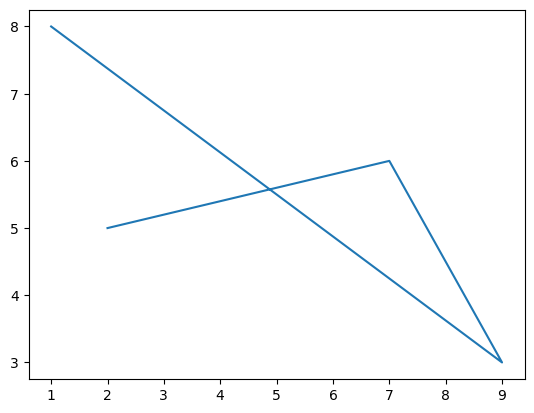

In [11]:
geneticAlgoritm(6,2)